In [10]:
data(iris)

In [11]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [12]:
set.seed(123)
iris_groups <- sample(1:3, nrow(iris), replace = TRUE)
table(iris_groups)

iris_groups
 1  2  3 
42 54 54 

In [13]:
set.seed(123)
iris_kmeans <- kmeans(iris[, 1:4], centers = 3, nstart = 20)
iris_kmeans

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [14]:
table(iris$Species, iris_kmeans$cluster)

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36

In [15]:
library(caret)
cluster_to_species <- as.character(iris_kmeans$cluster)
cluster_to_species[iris_kmeans$cluster == 1] <- "setosa"
cluster_to_species[iris_kmeans$cluster == 2] <- "versicolor"
cluster_to_species[iris_kmeans$cluster == 3] <- "virginica"

confusionMatrix(as.factor(cluster_to_species), iris$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48        14
  virginica       0          2        36

Overall Statistics
                                          
               Accuracy : 0.8933          
                 95% CI : (0.8326, 0.9378)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.84            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9600           0.7200
Specificity                 1.0000            0.8600           0.9800
Pos Pred Value              1.0000            0.7742           0.9474
Neg Pred Value              1.0000            0.9773           0.8750
P

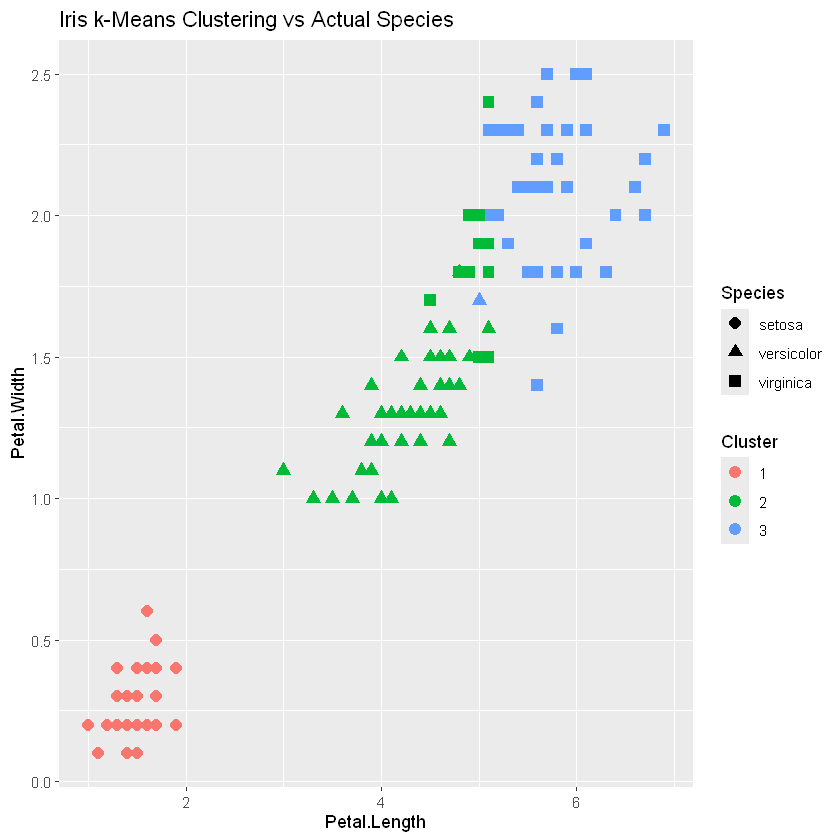

In [16]:
library(ggplot2)

iris$Cluster <- as.factor(iris_kmeans$cluster)

ggplot(iris, aes(Petal.Length, Petal.Width, color = Cluster, shape = Species)) +
  geom_point(size = 3) +
  labs(title = "Iris k-Means Clustering vs Actual Species")

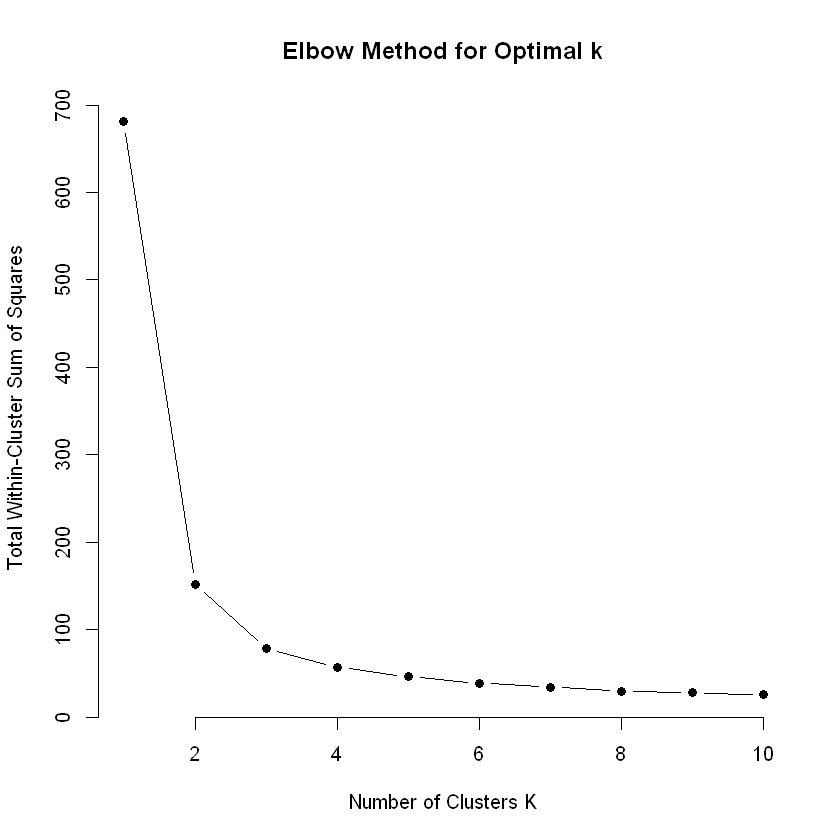

In [17]:
wss <- sapply(1:10, function(k){
  kmeans(iris[, 1:4], centers = k, nstart = 20)$tot.withinss
})

plot(1:10, wss, type="b", pch=19, frame=FALSE,
     xlab="Number of Clusters K",
     ylab="Total Within-Cluster Sum of Squares",
     main="Elbow Method for Optimal k")